In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [16]:
enc = LabelEncoder()
df.iloc[:,0] = enc.fit_transform(df.iloc[:,0])
df.iloc[:,3] = enc.fit_transform(df.iloc[:,3])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,68 Studley St,2,0,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,0,85 Turner St,2,0,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,0,25 Bloomburg St,2,0,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,0,18/659 Victoria St,3,2,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,0,5 Charles St,3,0,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [41]:
df2 = df[df.Price.notnull()]
df2 = df2[df2.Distance.notnull()]
df2 = df2[df2.Car.notnull()]
df2 = df2[df2.Landsize.notnull()]
df2 = df2[df2.YearBuilt.notnull()]
df2['year'] = (2018 - df2.YearBuilt)
df2 = df2[~df2['Landsize'].isin(['0'])]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9178 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           9178 non-null int64
Address          9178 non-null object
Rooms            9178 non-null int64
Type             9178 non-null int32
Price            9178 non-null float64
Method           9178 non-null object
SellerG          9178 non-null object
Date             9178 non-null object
Distance         9178 non-null float64
Postcode         9178 non-null float64
Bedroom2         9178 non-null float64
Bathroom         9178 non-null float64
Car              9178 non-null float64
Landsize         9178 non-null float64
BuildingArea     7879 non-null float64
YearBuilt        9178 non-null float64
CouncilArea      9178 non-null object
Lattitude        9171 non-null float64
Longtitude       9171 non-null float64
Regionname       9178 non-null object
Propertycount    9178 non-null float64
year             9178 non-null float64
dtypes: float64(13), int32(1), int64(2), objec

In [68]:
X = df2.iloc[:,[0,2,3,8,12,13,21]]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9178 entries, 2 to 34856
Data columns (total 7 columns):
Suburb      9178 non-null int64
Rooms       9178 non-null int64
Type        9178 non-null int32
Distance    9178 non-null float64
Car         9178 non-null float64
Landsize    9178 non-null float64
year        9178 non-null float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 537.8 KB


In [69]:
Y = df2.Price
Y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

In [70]:
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9178 entries, 2 to 34856
Data columns (total 7 columns):
Suburb      9178 non-null int64
Rooms       9178 non-null int64
Type        9178 non-null int32
Distance    9178 non-null float64
Car         9178 non-null float64
Landsize    9178 non-null float64
year        9178 non-null float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 537.8 KB


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(X_train, Y_train)
print(cross_val_score(linear, X_train, Y_train, cv=5))

[0.35948662 0.37590135 0.39705553 0.45022753 0.42608876]


RMSE:
516187.90649574023

R^2:
0.4360122355807299


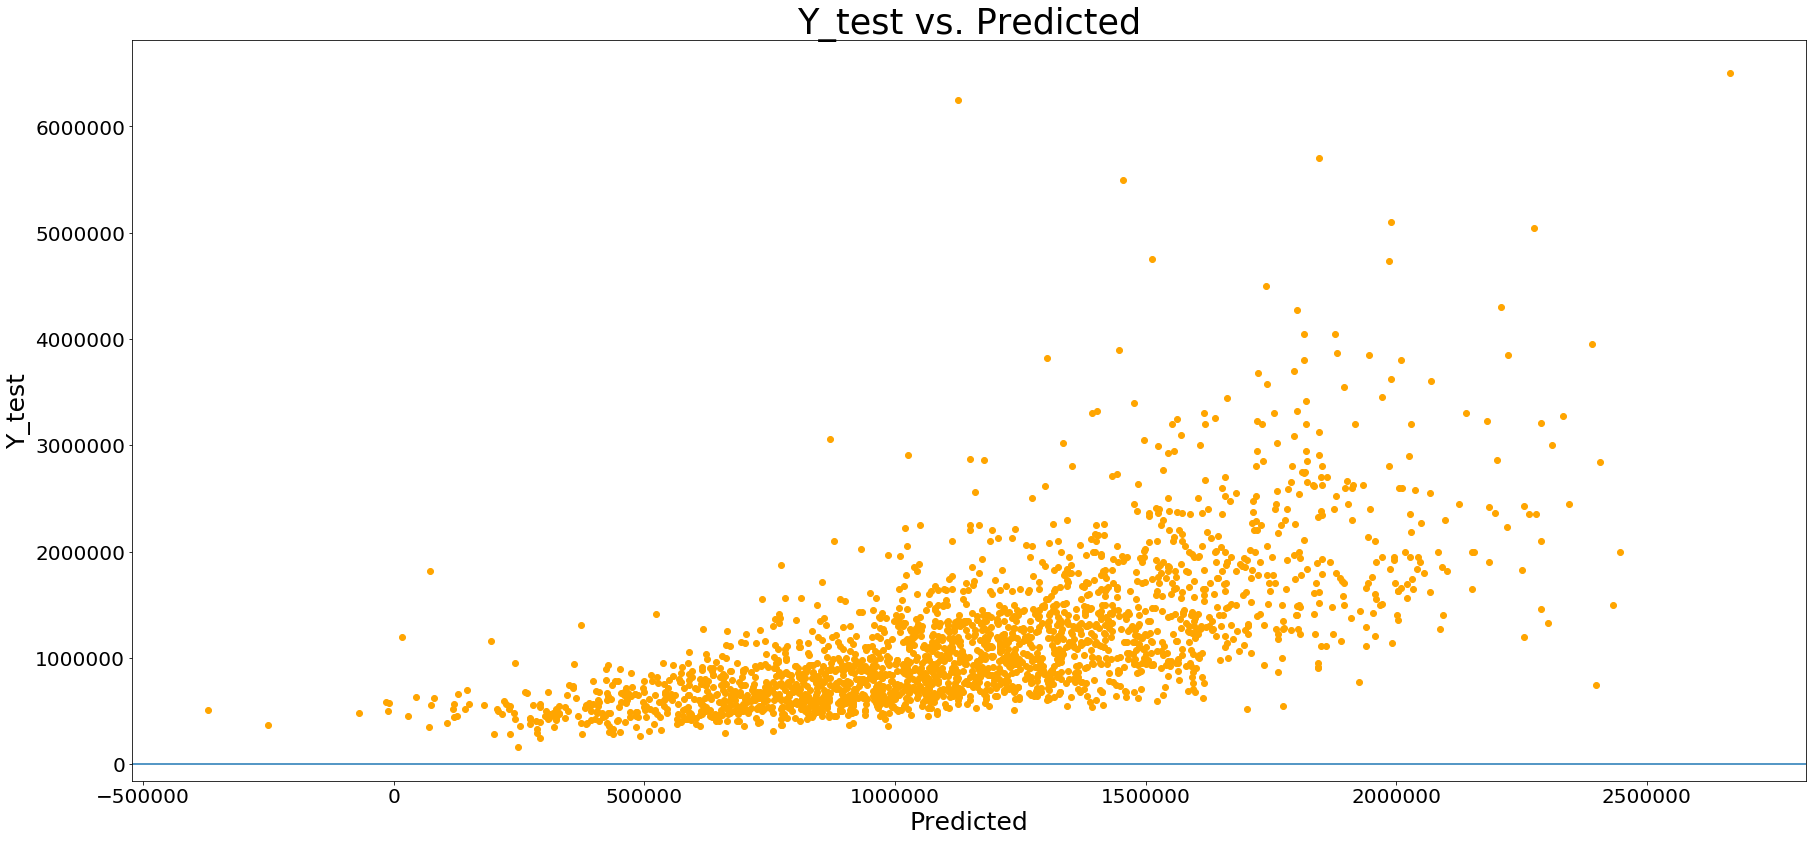

In [93]:
pred = linear.predict(X_test)
score = r2_score(Y_test,pred)

fig = plt.figure(figsize=(30,30))
ax2 = plt.subplot(212)
plt.scatter(pred, Y_test, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Y_test',fontsize=25)
plt.axhline(y=0)
plt.title('Y_test vs. Predicted',fontsize=35)
rmse = np.sqrt(mean_squared_error(Y_test, pred))

print('RMSE:')
print(rmse)
print("\nR^2:")
print(score)

In [94]:
from sklearn.externals import joblib
joblib.dump(linear, "mel_hp.ml")

['mel_hp.ml']